In [88]:
import pandas as pd

In [89]:
rice = pd.read_csv("Rice_Cammeo_Osmancik.csv")

In [90]:
rice.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity\t,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo


In [91]:
rice['Class'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [92]:
rice['Class']=rice['Class'].map({'Cammeo':0,'Osmancik':1})

In [93]:
rice['Class'].unique()

array([0, 1])

In [94]:
#splitting data into training and tesing data 

In [95]:
X = rice.drop('Class',axis=1)

In [96]:
X.head(2)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity\t,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436


In [97]:
y = rice['Class']

In [98]:
y.head(2)

0    0
1    0
Name: Class, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [101]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [102]:
#!pip install tensorflow

In [103]:
#!pip install tensorflow

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model

In [105]:
from tensorflow.keras.layers import Dense

In [106]:
model = Sequential()

In [107]:
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [108]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [109]:
history=model.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5805 - loss: 0.7386 - val_accuracy: 0.5722 - val_loss: 0.7255
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5785 - loss: 0.7139 - val_accuracy: 0.5722 - val_loss: 0.7078
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5662 - loss: 0.7060 - val_accuracy: 0.5722 - val_loss: 0.6969
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5681 - loss: 0.6953 - val_accuracy: 0.5722 - val_loss: 0.6889
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5772 - loss: 0.6843 - val_accuracy: 0.5722 - val_loss: 0.6822


In [110]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75 (304.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

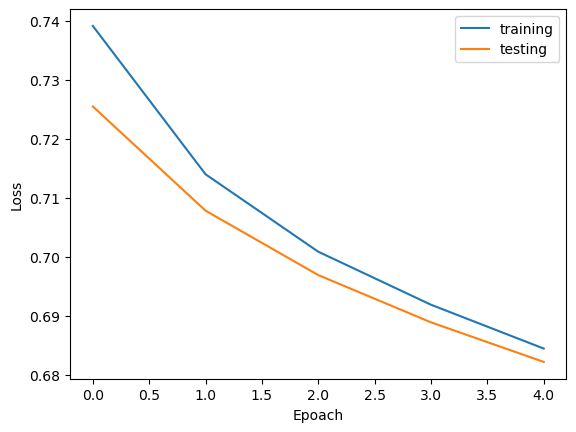

In [111]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='testing')
plt.xlabel('Epoach')
plt.ylabel('Loss')
plt.legend()

In [112]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_pred=[o if val <0.5 else 1 for val in y_pred]
accuracy_score(y_test,y_pred)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


0.5721784776902887